In [ ]:
# https://www.youtube.com/watch?v=RlugupBiC6w

# Policy iteration
# - start with an initial policy 
# - update the policy at each iteration

# Value iteration 
# - start with initial value function 
# - update the value functions at each iteration

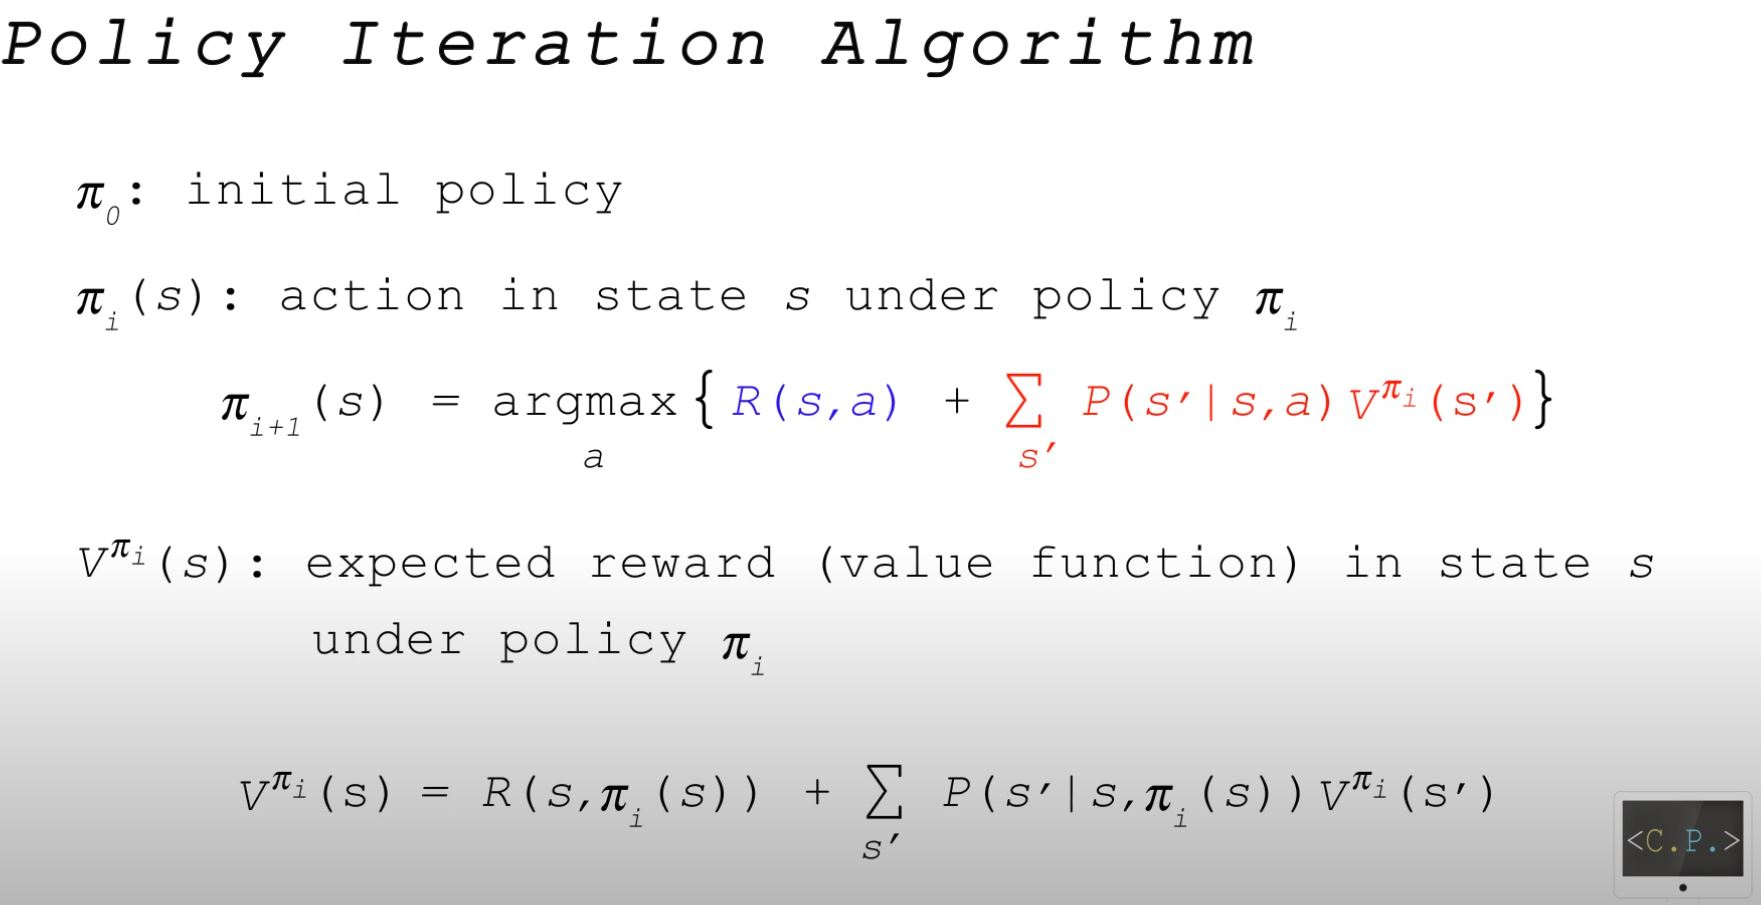

In [ ]:
N = 100
p = 0.4

In [ ]:
S = [*range(0, N+1)]    # 현재 내가 가지고 있는 돈 
A = [*range(0, N+1)]    # 내가 게임에 거는 돈. 

In [ ]:
def P(s_next, s, a):
    # 돈을 얻었을 때. 도박에 성공했을 때
    if s + a == s_next and a <= min(s, N-s) and a >= 1 and 0 < s < N :
        return p
    
    # 돈을 잃었을 때. 도박에 실패했을 때
    elif s - a == s_next and a <= min(s, N-s) and a >= 1 and 0 < s < N :
        return 1 - p

    # 아무것도 아닐 때
    else:
        return 0

In [ ]:
def R(s, a):
    if s == N:  # 게임에서 이겼다 
        return 1
    else:
        return 0

In [ ]:
def policy_iteration(S, A, P, R):
    """
    :param list S: set of states 
    :param list A: set of actions
    :param function P: transition function
    :param function R: reward function
    """

    policy = {s: A[0] for s in S}

    while True:
        old_policy = policy.copy()

        V = policy_evaluation(policy, S)

        policy = policy_improvement(V, S, A)

        if all(old_policy[s] == policy[s] for s in S):
            break 

    return policy

In [ ]:
def policy_evaluation(policy, S):
    '''
    update the value function under the given policy until they converge
    '''
    V = {s: 0 for s in S}

    while True:
        
        oldV = V.copy()

        for s in S:

            V[s] = R(s, policy[s]) + sum(P(s_next, s, policy[s]) * oldV[s_next] for s_next in S)

        if all(oldV[s] == V[s] for s in S):
            break 
    
    return V

In [ ]:
def policy_improvement(V, S, A):
    '''
    We will find the best policy for given value functions
    '''
    policy = {s: A[0] for s in S}

    for s in S:

        Q = {}

        for a in A:

            Q[a] = R(s, a) + sum( P(s_next, s, a) * V[s_next] for s_next in S )
        
        policy[s] = max(Q, key=Q.get)
    
    return policy

In [ ]:
optimal_policy = policy_iteration(S, A, P, R)

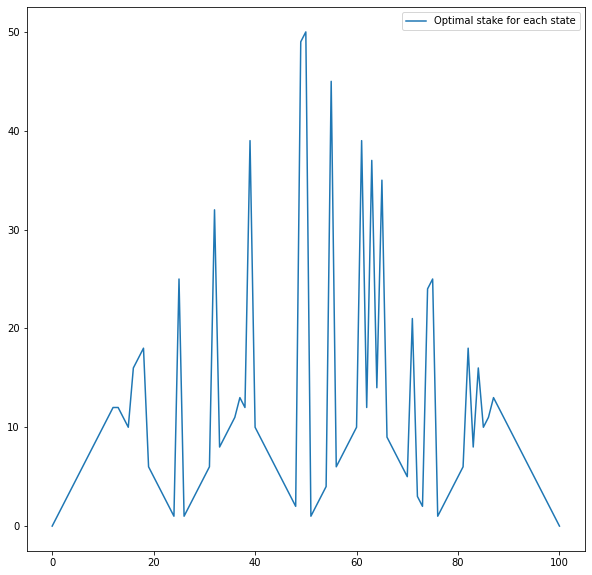

In [ ]:
# Visualize V and optimal policy

import matplotlib.pyplot as plt 

fig, ax = plt.subplots(figsize=(10, 10))

ax.plot(S, list(optimal_policy.values()), label='Optimal stake for each state')

ax.legend()
plt.show()